<a href="https://colab.research.google.com/github/nedokormysh/OpenEdu_HSE_INTRML/blob/week1/asset_v1_hse%2BINTRML%2Bspring_2020%2Btype_asset%2Bblock_%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# скачиваем файл
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1cq9JDz8-zwzoGL6udiT_ogHHRWdnsd1q' -O math_students.csv

"wget" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.
"id" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [ ]:
import pandas as pd
data = pd.read_csv('math_students.csv', delimiter=',')

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


1. Какая причина выбора школы была самой частой? В качестве ответа приведите соответствующее значение признака.

In [ ]:
data.reason.value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

2. Найдите количество студентов, у родителей которых нет никакого образования.

In [ ]:
data[(data['Medu'] == 0) & (data['Fedu'] == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
data[(data['Fedu'] == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,3,4,3,1,1,1,8,11,11,10
171,GP,M,16,U,GT3,T,1,0,other,other,...,4,3,2,1,1,3,2,13,15,16


In [ ]:
data[(data['Medu'] == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
249,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
324,GP,F,17,U,LE3,T,0,2,at_home,at_home,...,3,3,3,2,3,2,0,16,15,15


3. Найдите минимальный возраст учащегося школы Mousinho da Silveira.

In [ ]:
data[data['school'] == 'MS'].age.min()

17

4. Найдите количество студентов, имеющих нечетное число пропусков.

In [ ]:
query_odd = data['absences'] % 2 != 0

data[query_odd].shape[0]

41

5. Найдите разность между средними итоговыми оценками студентов, состоящих и не состоящих в романтических отношениях. В качестве ответа приведите число, округленное до двух значащих цифр после запятой.

In [ ]:
round(data[data['romantic'] == 'yes']['G3'].mean() - data[data['romantic'] == 'no']['G3'].mean(), 2)

-1.26

6. Сколько занятий пропустило большинство студентов с самым частым значением наличия внеклассных активностей?

*Примечание. В данном контексте под "большинством" подразумеваются студенты, имеющее самое частое значение пропусков. То есть в данном задании необходимо:*


* *Определить самое частое значение наличия внеклассных активностей (да или нет).*
* *Для группы студентов, соответствующей этому значению, рассмотреть значения признака «число пропусков».*
* *Для каждого значения числа пропусков посчитать, сколько студентов ему соответствует.*
* *Выбрать значение числа пропусков с наибольшим числом студентов.*



In [ ]:
data['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

<AxesSubplot:>

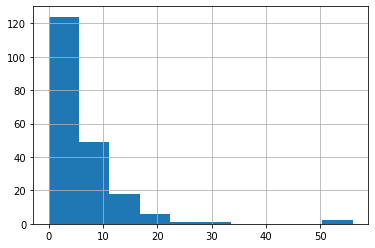

In [ ]:
query_act = data['activities'] == 'yes'
data[query_act]['absences'].hist()

In [ ]:
data[query_act]['absences']

3       2
5      10
9       0
11      4
12      2
       ..
381     5
382     2
386     7
387     0
389     0
Name: absences, Length: 201, dtype: int64

In [ ]:
data[query_act]['absences'] == 2

3       True
5      False
9      False
11     False
12      True
       ...  
381    False
382     True
386    False
387    False
389    False
Name: absences, Length: 201, dtype: bool

In [ ]:
data[query_act]['absences'].value_counts()

0     51
2     37
4     29
6     17
8     16
10     9
14     7
3      4
16     4
15     3
12     3
7      3
11     2
1      2
9      2
18     2
20     2
13     1
5      1
17     1
22     1
25     1
30     1
54     1
56     1
Name: absences, dtype: int64